In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import hist
hep.style.use("CMS")
mpl.rcParams['figure.facecolor'] = 'white'

Read in the data

In [15]:
results = np.load("lambda1_normalizedOutputs/disco_results.npy")
save_dir = 'lambda1_normalizedOutputs/'

suep_cl1 = results[0][results[2] == 1]
suep_cl2 = results[1][results[2] == 1]
qcd_cl1 = results[0][results[2] == 0]
qcd_cl2 = results[1][results[2] == 0]

Make 2D histograms using the ABCD variables.

In [16]:
hist_abcd = (
     hist.new
    .Regular(100, 0, 1, name="cl1", label="Classifier Output 1")
    .Regular(100, 0, 1, name="cl2", label="Classifier Output 2")
    .Weight()
)

hist_abcd.fill(qcd_cl1, qcd_cl2)

Hist(
  Regular(100, 0, 1, name='cl1', label='Classifier Output 1'),
  Regular(100, 0, 1, name='cl2', label='Classifier Output 2'),
  storage=Weight()) # Sum: WeightedSum(value=57434, variance=57434) (WeightedSum(value=57435, variance=57435) with flow)

In [17]:
hist_abcd_suep = (
     hist.new
    .Regular(100, 0, 1, name="cl1", label="Classifier Output 1")
    .Regular(100, 0, 1, name="cl2", label="Classifier Output 2")
    .Weight()
)

hist_abcd_suep.fill(suep_cl1, suep_cl2)

Hist(
  Regular(100, 0, 1, name='cl1', label='Classifier Output 1'),
  Regular(100, 0, 1, name='cl2', label='Classifier Output 2'),
  storage=Weight()) # Sum: WeightedSum(value=29931, variance=29931) (WeightedSum(value=29934, variance=29934) with flow)

Make 1D projections out of the 2D histograms.

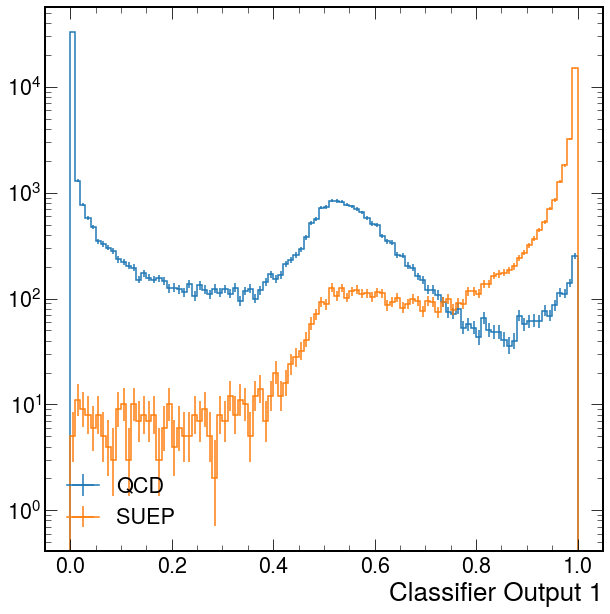

In [18]:
_ = hep.histplot(hist_abcd.project(0), label="QCD")
_ = hep.histplot(hist_abcd_suep.project(0), label="SUEP")
_ = plt.legend()
plt.yscale("log")
plt.savefig(save_dir+"1d_classifier_output_1.png")

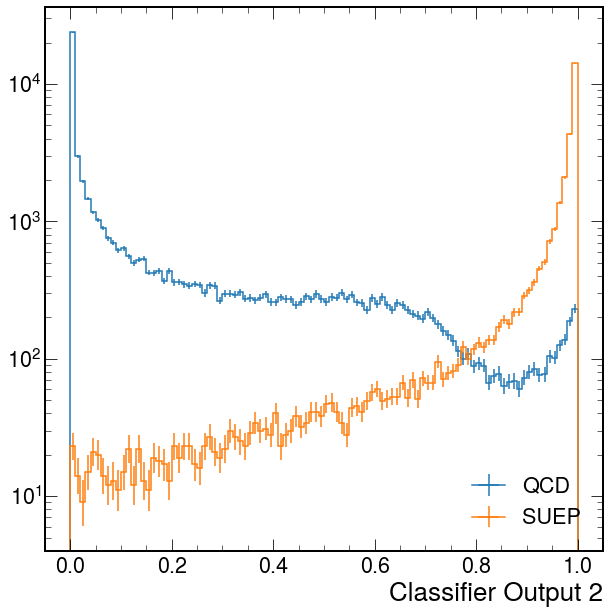

In [19]:
_ = hep.histplot(hist_abcd.project(1), label="QCD")
_ = hep.histplot(hist_abcd_suep.project(1), label="SUEP")
_ = plt.legend()
plt.yscale("log")
plt.savefig(save_dir+"1d_classifier_output_2.png")

Check for closure in D region for QCD.

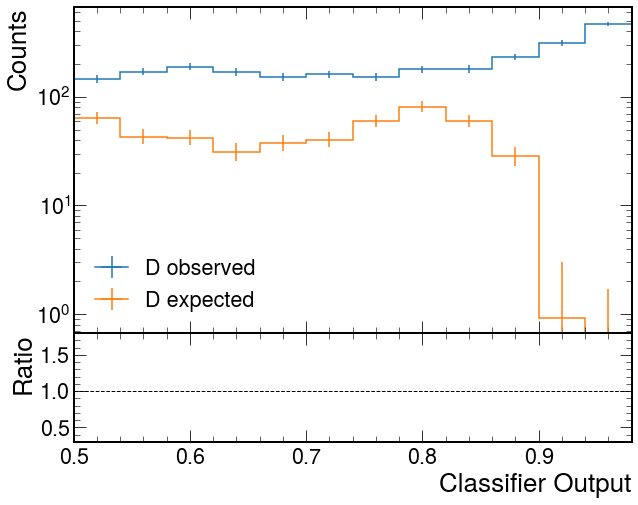

In [20]:
A = hist_abcd[0.1j:0.5j:sum,0.1j:0.5j:4j]
B = hist_abcd[0.1j:0.5j:sum,0.5j:1.0j:4j]
C = hist_abcd[0.5j:1.0j:sum,0.1j:0.5j:4j]
D = hist_abcd[0.5j:1.0j:sum,0.5j:1.0j:4j]
D_exp = B * C.sum().value / A.sum().value

fig = plt.figure(figsize=(10, 8))
main, sub = D.plot_ratio(D_exp,
                rp_num_label='D observed',
                rp_denom_label='D expected',
                rp_uncert_draw_type="bar")
fig.axes[0].set_yscale("log")
#fig.axes[0].set_xlim(0.5,1)
fig.axes[1].set_xlabel("Classifier Output")
fig.axes[1].set_ylim(0.3,1.8)
plt.savefig(save_dir+"ABCD_D_region.png")

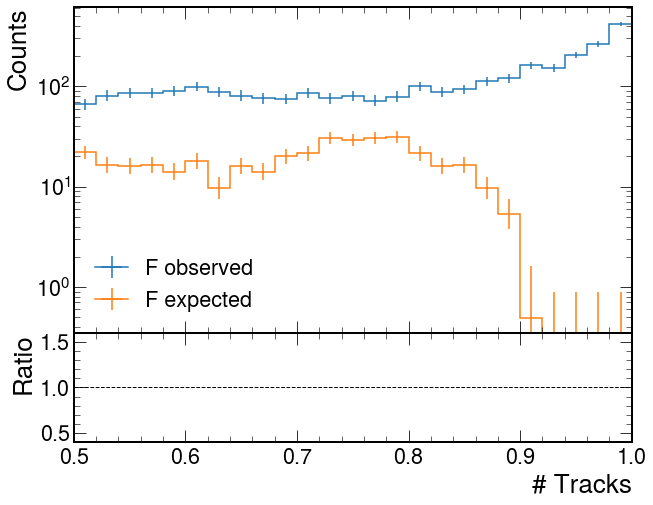

In [21]:
A = hist_abcd[0.05j:0.5j:sum,0.0j:0.05j:2j]
B = hist_abcd[0.05j:0.5j:sum,0.05j:0.5j:2j]
C = hist_abcd[0.05j:0.5j:sum,0.5j:1.0j:2j]
D = hist_abcd[0.5j:1.0j:sum,0.0j:0.05j:2j]
E = hist_abcd[0.5j:1.0j:sum,0.05j:0.5j:2j]
F = hist_abcd[0.5j:1.0j:sum,0.5j:1.0j:2j]
F_exp = C * E.sum().value**2 * A.sum().value / (B.sum().value**2 * D.sum().value)

fig = plt.figure(figsize=(10, 8))
main, sub = F.plot_ratio(F_exp,
                rp_num_label='F observed',
                rp_denom_label='F expected',
                rp_uncert_draw_type="bar")
fig.axes[0].set_yscale("log")
#fig.axes[0].set_xlim(0.5,1)
fig.axes[1].set_xlabel("# Tracks")
fig.axes[1].set_ylim(0.4,1.6)
plt.savefig(save_dir+"ABCD_6regions.png")

Check for indendence of the two ABCD variables by making 1D histograms of different slices.

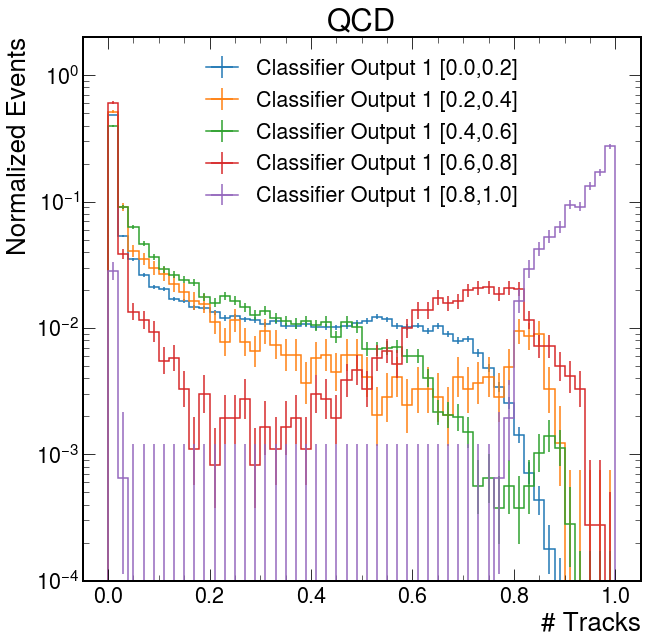

In [48]:
# parameters
save = True
slice_label = 'Classifier Output 1'            
slices = [[0.0j,0.2j],[0.2j,0.4j],[0.4j,0.6j],[0.6j,0.8j],[0.8j,1.0j]]

#  color map
cmap = plt.cm.rainbow(np.linspace(0, 1, len(slices)))

plt.clf()
for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    h = hist_abcd[val_lo:val_up:sum,0.0j::2j]
            
    hep.histplot(h,
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo.imag, val_up.imag))    

plt.legend()
plt.title("QCD")
#plt.xlim(0.0,1.0)
plt.ylim(1e-4,2)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("# Tracks")
if save: plt.savefig(save_dir + "QCD_CL1_slices.png",  bbox_inches='tight')

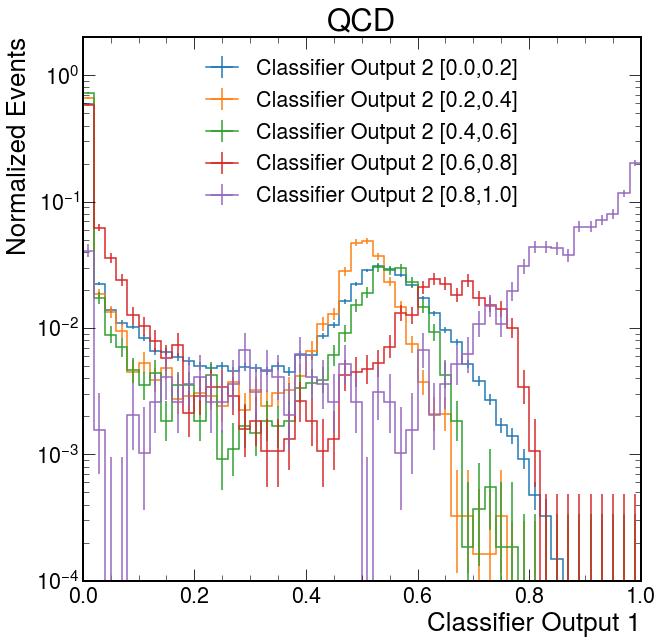

In [49]:
# parameters
save = True
slice_label = 'Classifier Output 2'            
slices = [[0.0j,0.2j],[0.2j,0.4j],[0.4j,0.6j],[0.6j,0.8j],[0.8j,1.0j]]

#  color map
cmap = plt.cm.rainbow(np.linspace(0, 1, len(slices)))

plt.clf()
for i in range(len(slices)):
    val_lo = slices[i][0]
    val_up = slices[i][1]
    
    h = hist_abcd[::2j, val_lo:val_up:sum]
            
    hep.histplot(h,
                 yerr=True, density=True, 
                 label=slice_label+" [{0},{1}]".format(val_lo.imag, val_up.imag))    

plt.legend()
plt.title("QCD")
plt.xlim(0.0,1.0)
plt.ylim(1e-4,2)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Classifier Output 1")
if save: plt.savefig(save_dir + "QCD_CL2_slices.png",  bbox_inches='tight')